<a href="https://colab.research.google.com/github/Airee66/MAT421/blob/main/ModuleB_17_4_17_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chapter 17
### Ainsley Chapman
### Date: 1/29/2023

## Section 17.4 - Lagrange Polynomial Interpolation

Lagrange polynomial interpolation is similar to cubic spline interpolation except instead of finding multiple polynomial functions between points and connecting them, we find a polynomial that goes through all the data points.  This polynomial is called a Lagrange polynomial $L(x)$.

To determine $L(x)$, we need to find the Lagrange basis polynomials, $P_i(x)$.

$ P_i(x) = \prod_{j = 1, j\ne i}^n\frac{x - x_j}{x_i - x_j}$

Which are then used in the following calculation of $L(x)$

$L(x) = \sum_{i = 1}^n y_i P_i(x) $

Below is an example in python with $x = [1, 2, 3, 4]$ and $y = [1, 3, 5, 3]$ 



-9.0 + 13.0·x¹ - 3.0·x²


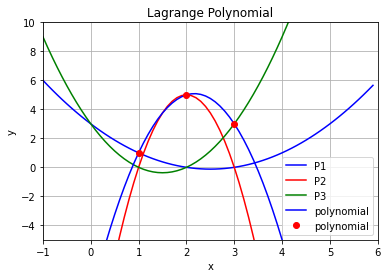

In [30]:
import numpy as np
import numpy.polynomial.polynomial as poly
import matplotlib.pyplot as plt
from scipy.interpolate import lagrange

x = [1, 2, 3]
y = [1, 5, 3]

P1coef = [3, -5/2, 1/2]
P2coef = [-3, 4, -1]
P3coef = [1, -3/2, 1/2]

P1 = poly.Polynomial(P1coef)
P2 = poly.Polynomial(P2coef)
P3 = poly.Polynomial(P3coef)

p1 = P1
p2 = 5*P2
p3 = 3*P3

xnew = np.arange(-1, 6, 0.1)

L = 1*P1 + 5*P2 + 3*P3
print(L)


plt.plot(xnew, P1(xnew), 'b', label = 'P1')
plt.plot(xnew, p2(xnew), 'r', label = 'P2')
plt.plot(xnew, p3(xnew), 'g', label = 'P3')
plt.plot(xnew, L(xnew), 'b', x, y, 'ro', label = 'polynomial')
plt.title("Lagrange Polynomial")
plt.legend()
plt.xlim(-1, 6)
plt.ylim(-5, 10)
plt.title('Lagrange Polynomial')
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.show()
plt.show()

We can also use the lagrange function from the scipy library to find $L(x)$

    2
-3 x + 13 x - 9


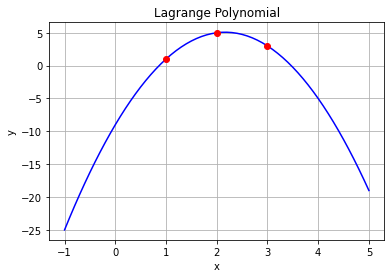

In [16]:
polypy = lagrange(x,y)
print(polypy)

plt.plot(xnew, polypy(xnew), 'b', x, y, 'ro')
plt.title('Lagrange Polynomial')
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## Section 17.5 - Newton’s Polynomial Interpolation

Newton's polynomial interpolation is another exact way to generate a function that fits a set of data points.  Like the Lagrange polynomial, Newton's polynomial requires the calculation of basis polynomials except the coefficients are determined by generating a divided differences table. 


$n - 1$ order newton polynomial:
$f(x) = \sum_{i=0}^{n}{a_in_i(x)}$

Where,   
$n_i(x) = \prod_{j=0}^{i-1}(x-x_j)$

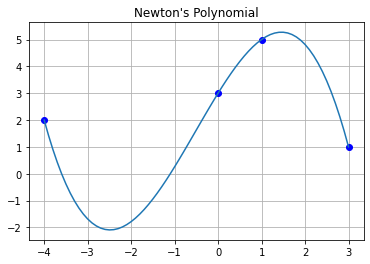

In [44]:
# generate divided differences table
def divdiff(x, y):
    n = len(y)
    coef = np.zeros([n, n])
    coef[:,0] = y
    
    for j in range(1,n):
        for i in range(n-j):
            coef[i][j] = \
           (coef[i+1][j-1] - coef[i][j-1]) / (x[i+j]-x[i])
            
    return coef

# Evaluate polynomial at x
def newtpoly(coef, xdata, x):
    n = len(xdata) - 1 
    p = coef[n]
    for k in range(1, n+1):
        p = coef[n-k] + (x -xdata[n-k])*p
    return p

x = np.array([0, 1, -4, 3])
y = np.array([3, 5, 2, 1])
# get the divided difference coef
a_s = divdiff(x, y)[0, :]

# evaluate on new data points
x_new = np.arange(-4, 3.1, .1)
y_new = newtpoly(a_s, x, x_new)

plt.plot(x, y, 'bo')
plt.plot(x_new, y_new)
plt.grid()
plt.title("Newton's Polynomial")
plt.show()